# cygnus-width-threshold

Evaluate different Q-value thresholds for Cygnus-Width

In [32]:
from importlib import reload
from matplotlib import colormaps
from matplotlib import pyplot as plt
import numpy as np
from utils import plots, stats, tables, utils

# Configuration

In [96]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
]
prefetch_thresholds = [-14.0, -12.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0,
                       -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 
                        6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
dpi = 192

In [3]:
def get_threshold_color(pt, thresholds):
    value = (pt - np.min(thresholds)) / np.ptp(thresholds)
    return colormaps['viridis'](value)

In [33]:
dfs = {
    'baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', 
        ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    'pythia': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv',
        features, feature_key='pythia_features'),

    'pythia_width': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/bwaware3_pythialike_width_moreactions.csv',
        features, feature_key='bythio_features'),
}

for pt in prefetch_thresholds:
    name = f'degreedyn/bythio/bwaware3_width_moreactions_threshold/{pt}prefetch'
    dfs[pt] = tables.load_stats_csv_pythia(
        base_dir, f'{name}.csv', features,
        feature_key='bythio_features')

# Plots

## 1-core, dynamic degree

In [34]:
# Comparisons
degreedyn_1core_df = {}
for pt in prefetch_thresholds:
    degreedyn_1core_df[f'Cygnus-Width {pt}'] = dfs[pt]['Delta_Path, PC_Delta']

degreedyn_1core_df['SPP+PPF'] = dfs['baseline']['spp_ppf_dev']
degreedyn_1core_df['Pythia-Width 3.0'] = dfs['pythia_width']['Delta_Path, PC_Delta']
degreedyn_1core_df['Pythia-Depth'] = dfs['pythia']['Delta_Path, PC_Delta']

# Colors
degreedyn_1core_colors = {}
for pt in prefetch_thresholds:
    degreedyn_1core_colors[f'Cygnus-Width {pt}'] = get_threshold_color(pt, prefetch_thresholds)

degreedyn_1core_colors['SPP+PPF'] = 'darkturquoise'
degreedyn_1core_colors['Pythia-Width 3.0'] = 'darkgray'
degreedyn_1core_colors['Pythia-Depth'] = 'C0'

# Legend parameters
degreedyn_1core_legend_kwargs = {
    'ncol': 5,
    'fontsize': 6,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degreedyn_1core_suptitle = '512 KB, dynamic degree, 1 core'

In [91]:
def plot_thresholds(data_df, suites=suites, metric='ipc_improvement',
                    colors={}, legend_kwargs={}, dpi=None, figsize=None,
                    suptitle=""):
    # Construct dataset
    keys = []
    for k in data_df.keys():
        if 'Cygnus-Width' in k:
            keys.append(k)
    keys = sorted(keys, key=lambda x: float(x.split(' ')[1]))
    Xs = [float(k.split(' ')[1]) for k in keys]
    data_df_ = {k: data_df[k] for k in keys}
    table = tables.gen_table_metric_all(data_df_, suites, metric,)
    
    # Plot
    fig, ax = plt.subplots()
    for i, column in enumerate(table.columns):
        color = colors[column] if column in colors else None
        ax.plot(Xs, table[column], '.-', label=column, color=color)

    # Legend
    ax.legend(**legend_kwargs)

    # Axes
    ax.set_xlabel('Prefetch Threshold')
    ax.set_xticks(np.arange(-14, 22, 2))
    ax.set_ylabel(f'{utils.get_mean_type(metric)} {metric.replace("_", " ")}')
    ax.axvline(-4, ls='--', color='red')
    ax.axvline(3, ls='--', color='gray')

    # Grid
    ax.grid(color='lightgray')
    ax.set_axisbelow(True)

    # Title
    title = f'Threshold vs. {metric.replace("_", " ")} ({suptitle})'
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

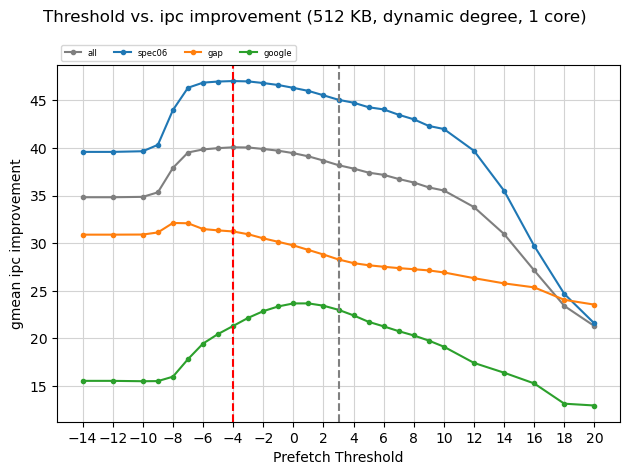

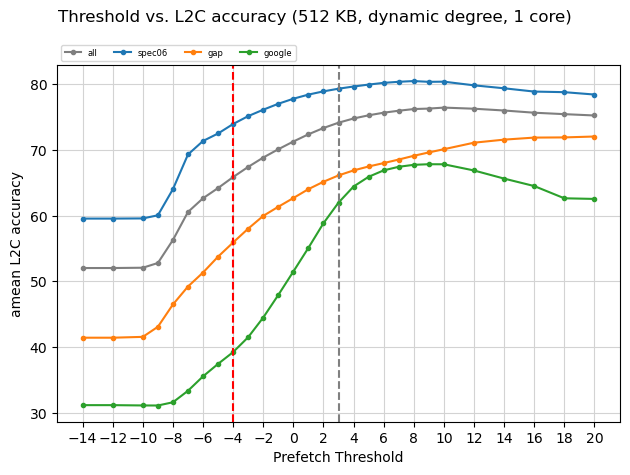

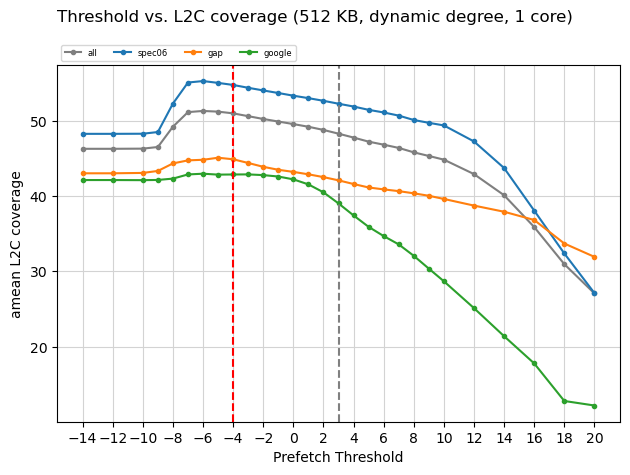

In [97]:
suite_colors = {
    'spec06': 'C0',
    'gap': 'C1',
    'google': 'C2',
    'all': 'C7',
}

plot_thresholds(degreedyn_1core_df, suites=suites, metric='ipc_improvement',
                colors=suite_colors, legend_kwargs=degreedyn_1core_legend_kwargs,
                dpi=dpi, figsize=(10, 6), suptitle=degreedyn_1core_suptitle)

plot_thresholds(degreedyn_1core_df, suites=suites, metric='L2C_accuracy',
                colors=suite_colors, legend_kwargs=degreedyn_1core_legend_kwargs,
                dpi=dpi, figsize=(10, 6), suptitle=degreedyn_1core_suptitle)

plot_thresholds(degreedyn_1core_df, suites=suites, metric='L2C_coverage',
                colors=suite_colors, legend_kwargs=degreedyn_1core_legend_kwargs,
                dpi=dpi, figsize=(10, 6), suptitle=degreedyn_1core_suptitle)

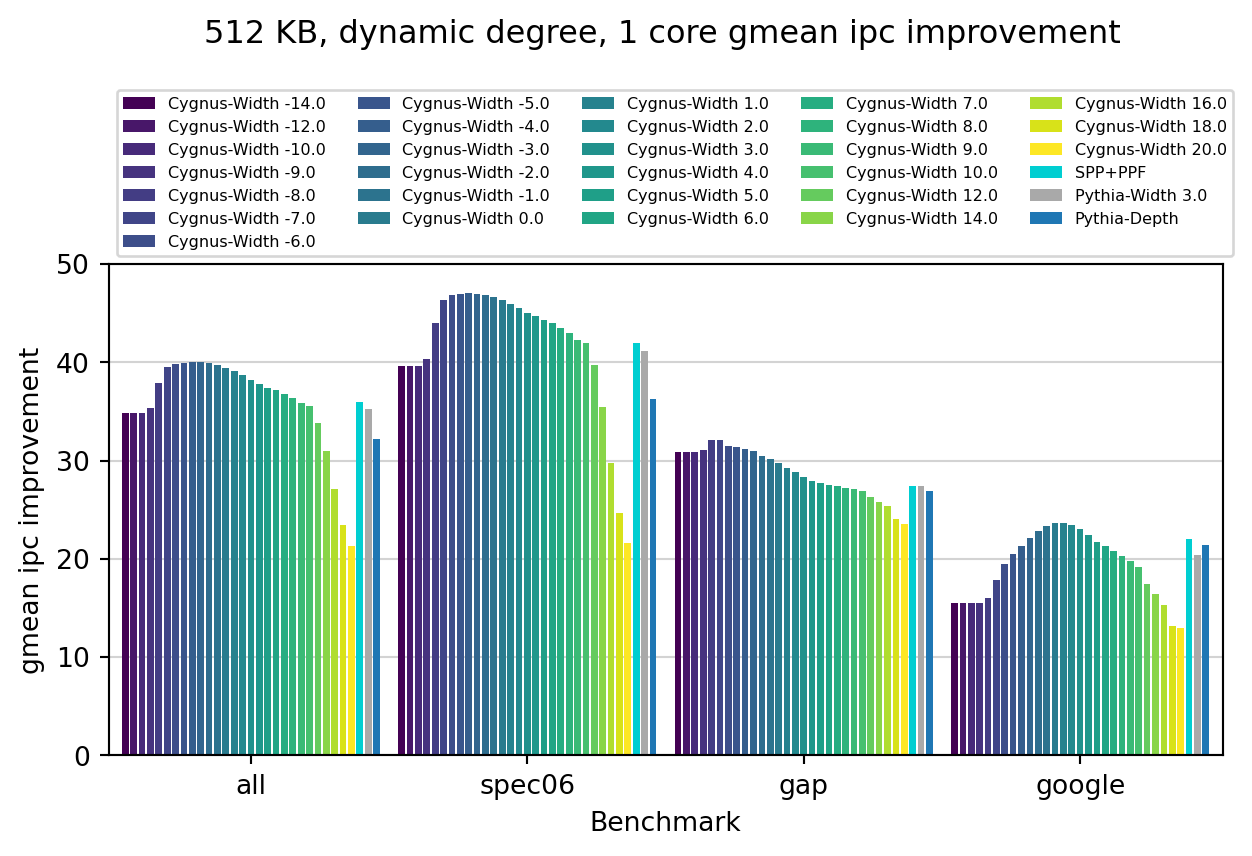

In [6]:
reload(plots)
plots.plot_metric_means(degreedyn_1core_df, suites=suites, metric='ipc_improvement', 
                        colors=degreedyn_1core_colors,
                        legend_kwargs=degreedyn_1core_legend_kwargs, 
                        dpi=192, figsize=(7, 4.5),
                        suptitle=degreedyn_1core_suptitle)

=== spec06 weighted ===


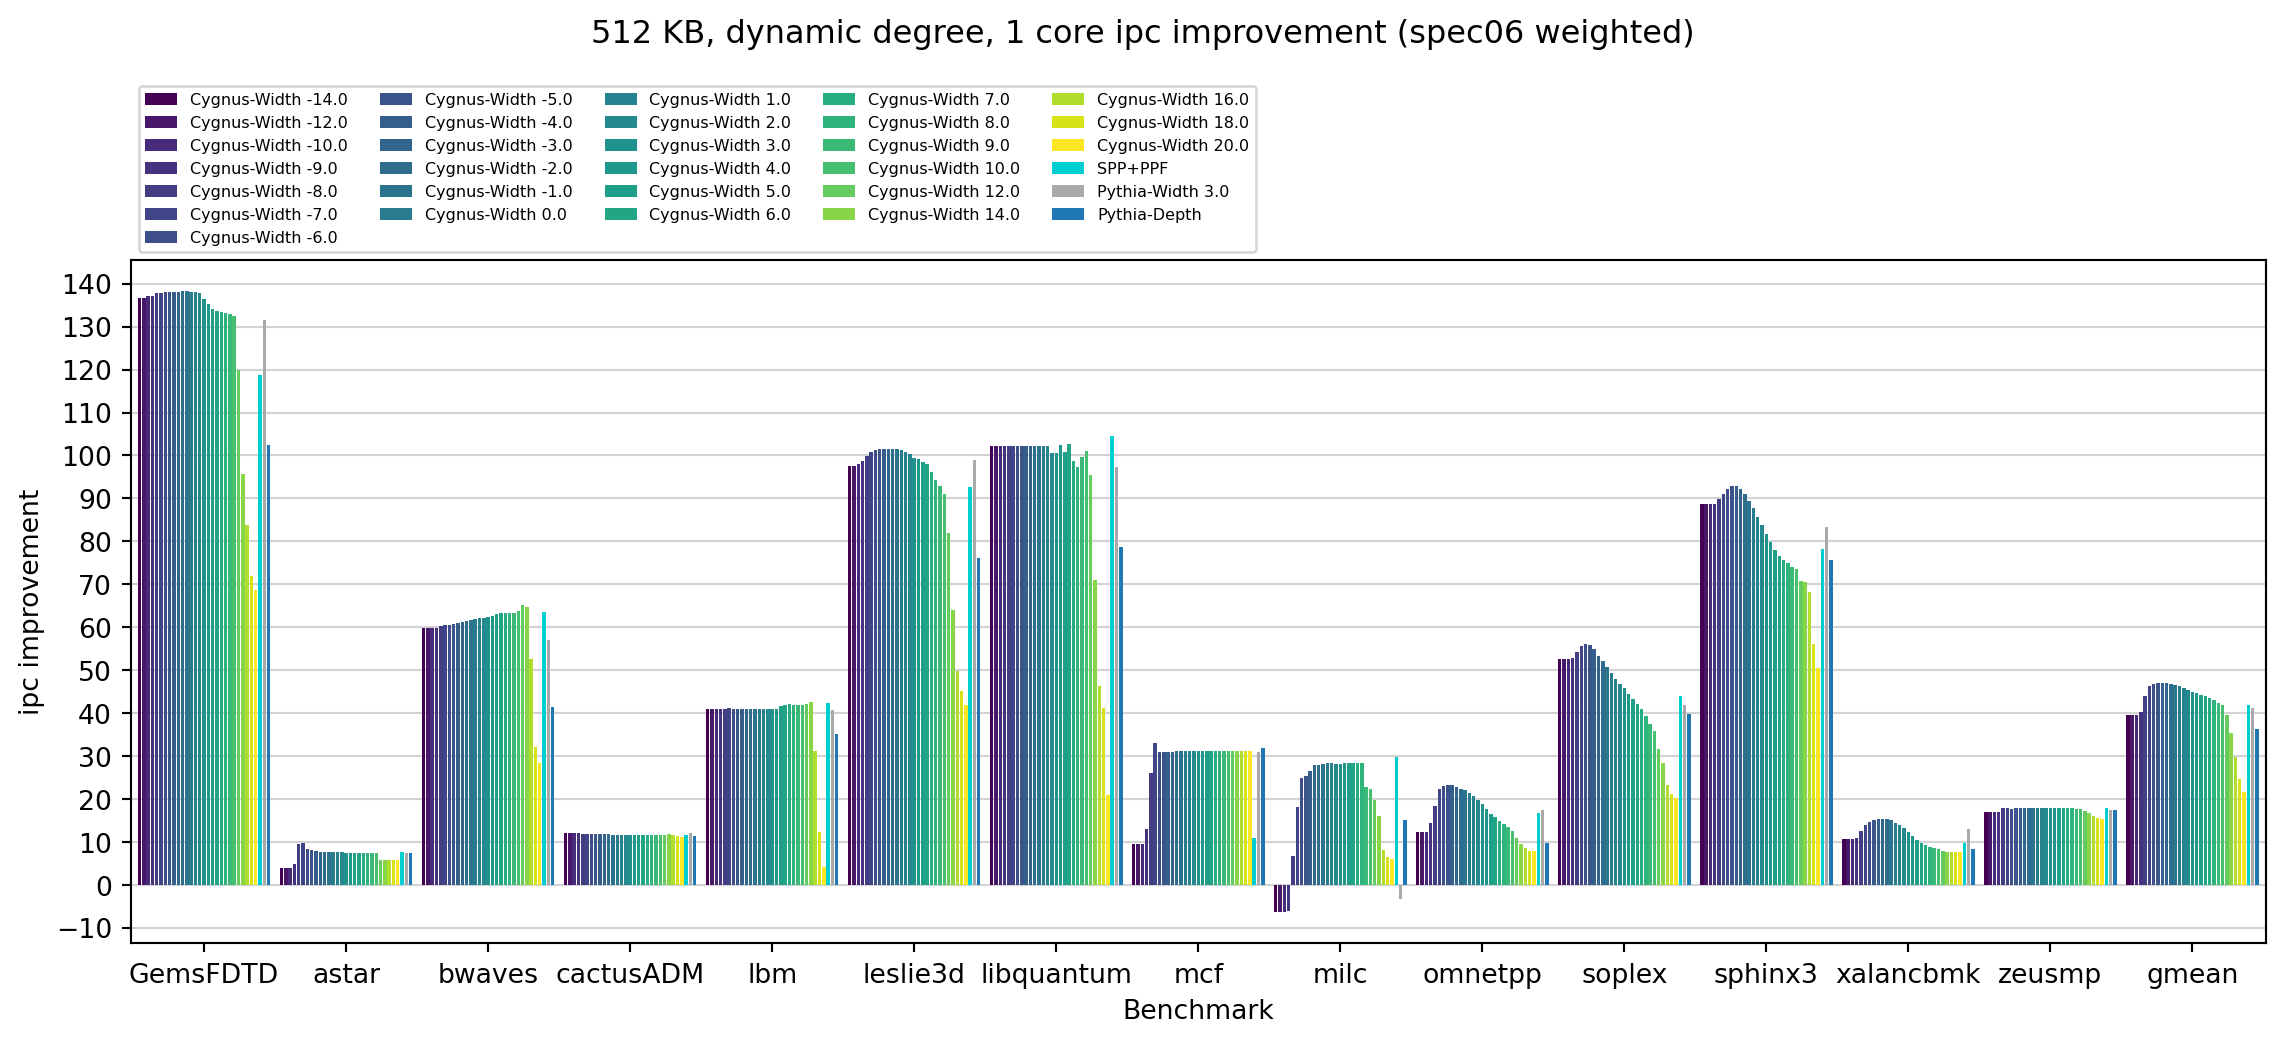

=== gap one_phase ===


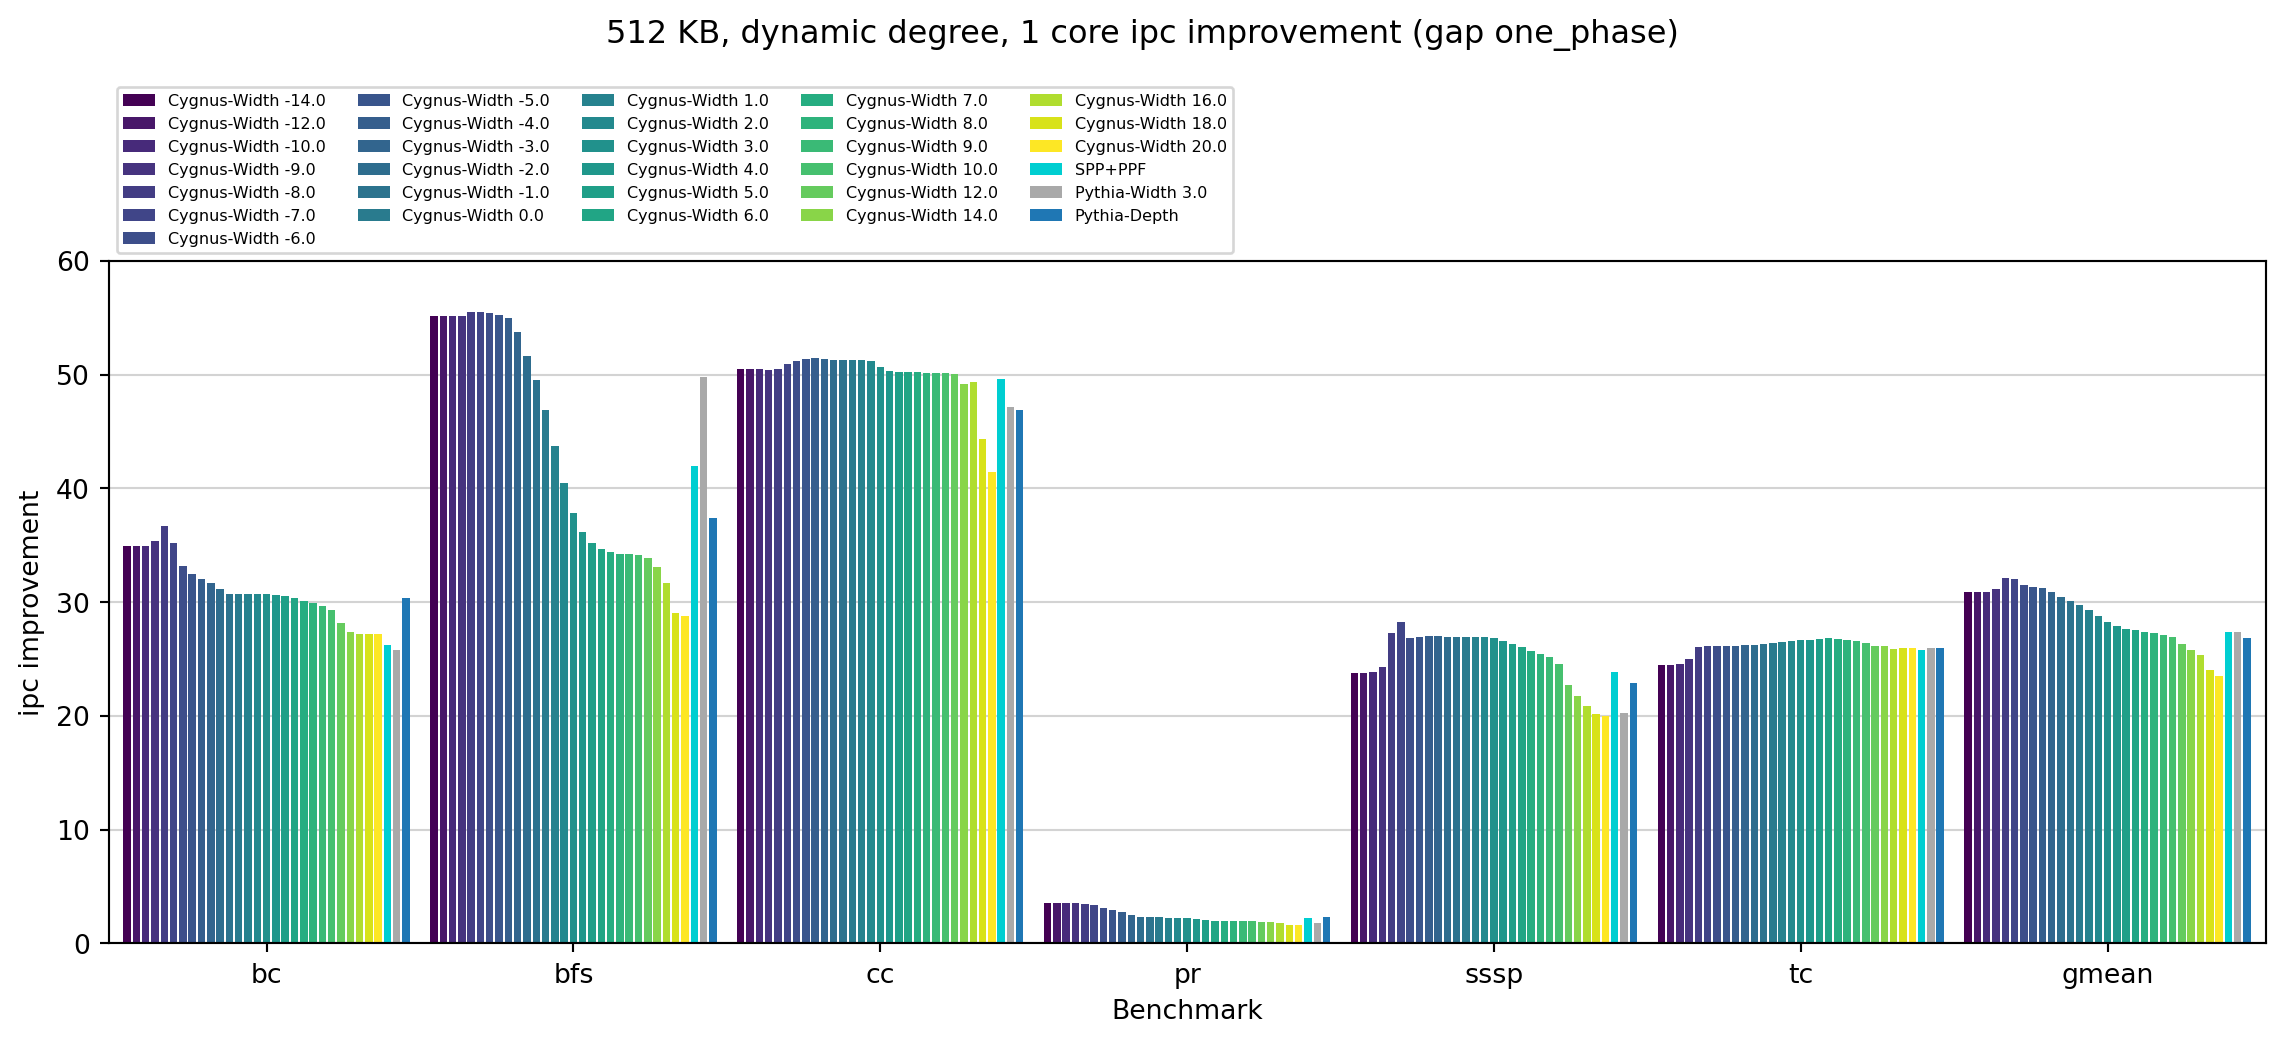

=== google one_phase ===


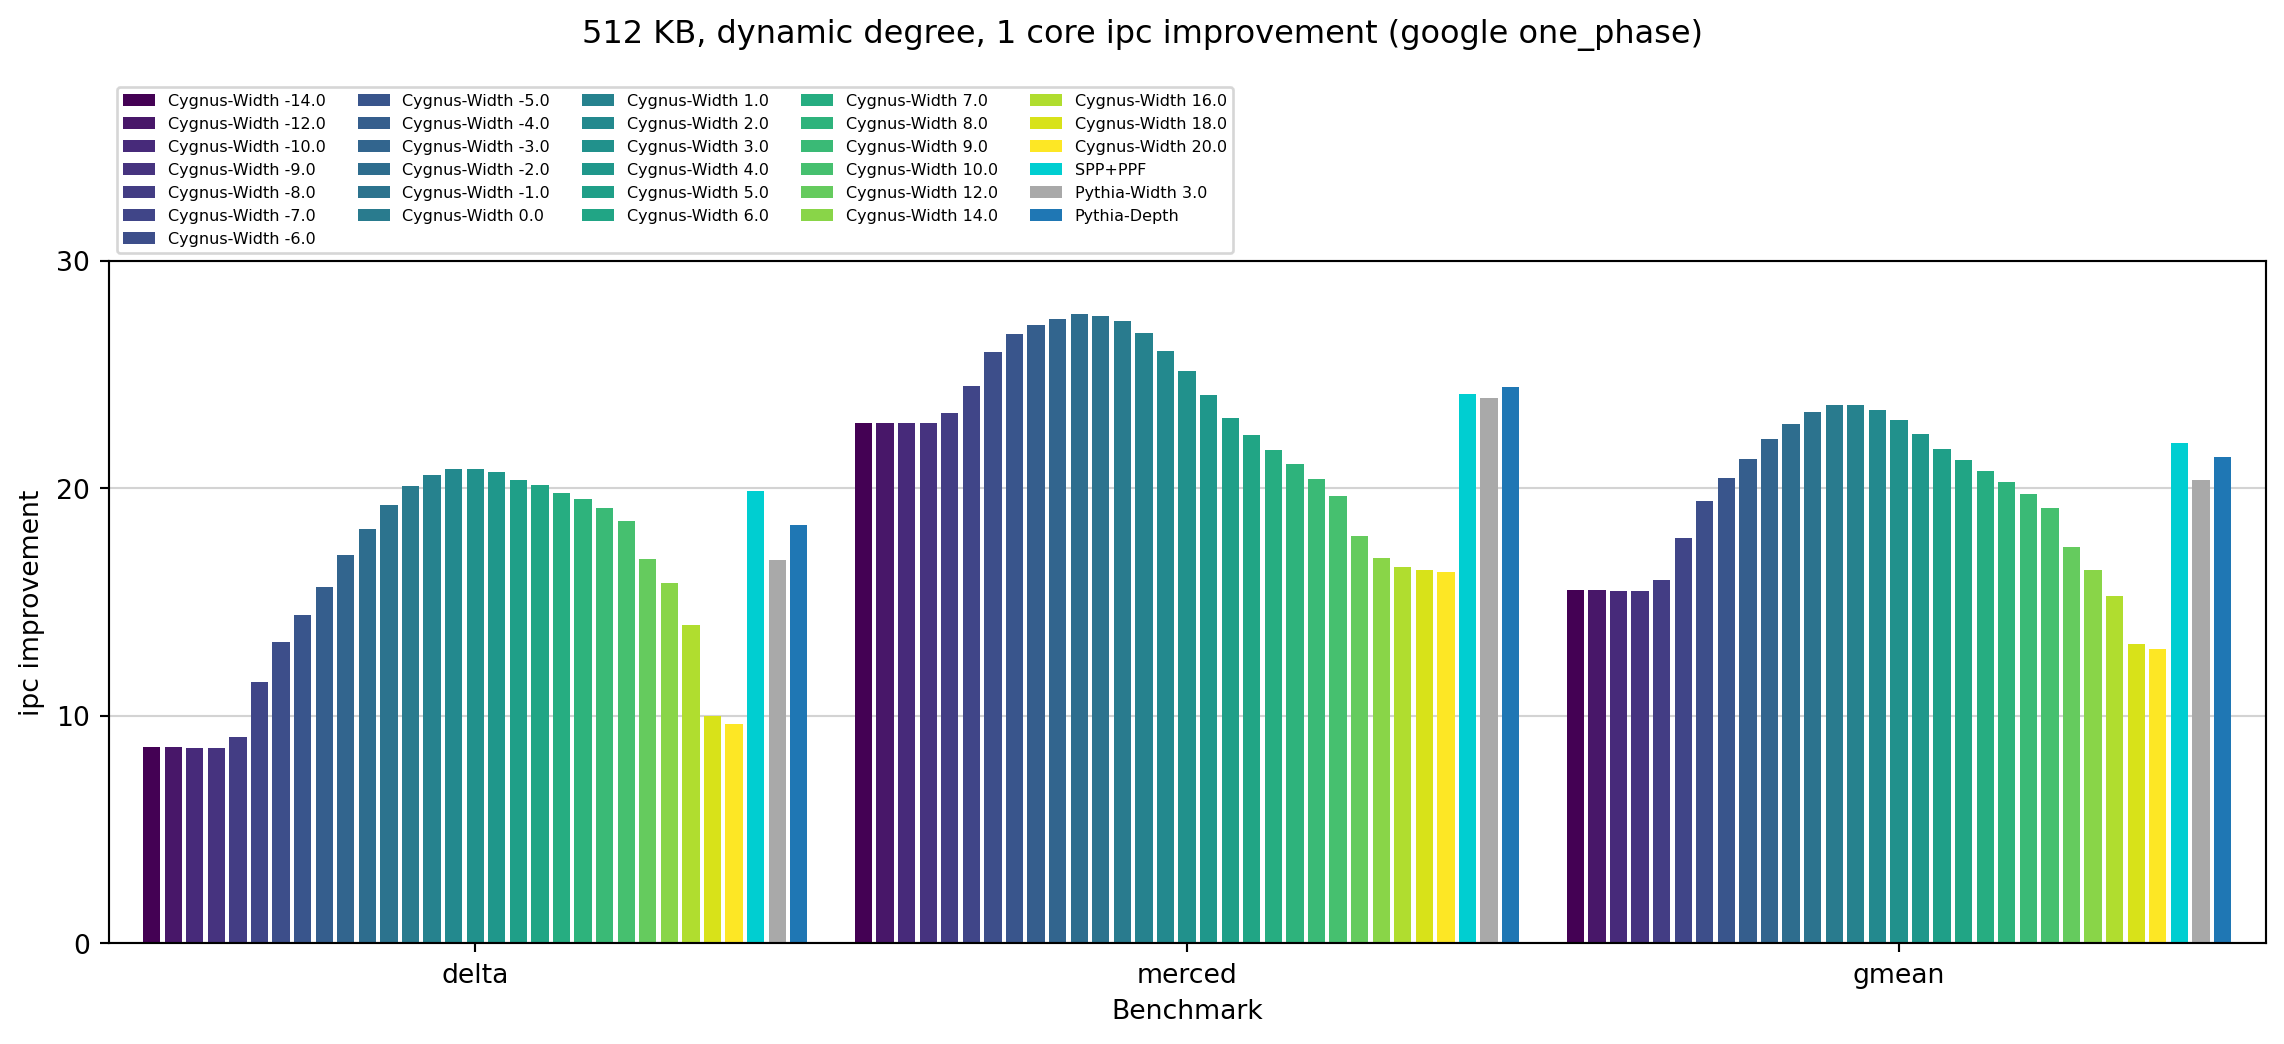

In [7]:
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=metrics, 
                      colors=degreedyn_1core_colors,
                      legend_kwargs=degreedyn_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_suptitle)

=== spec06 weighted ===


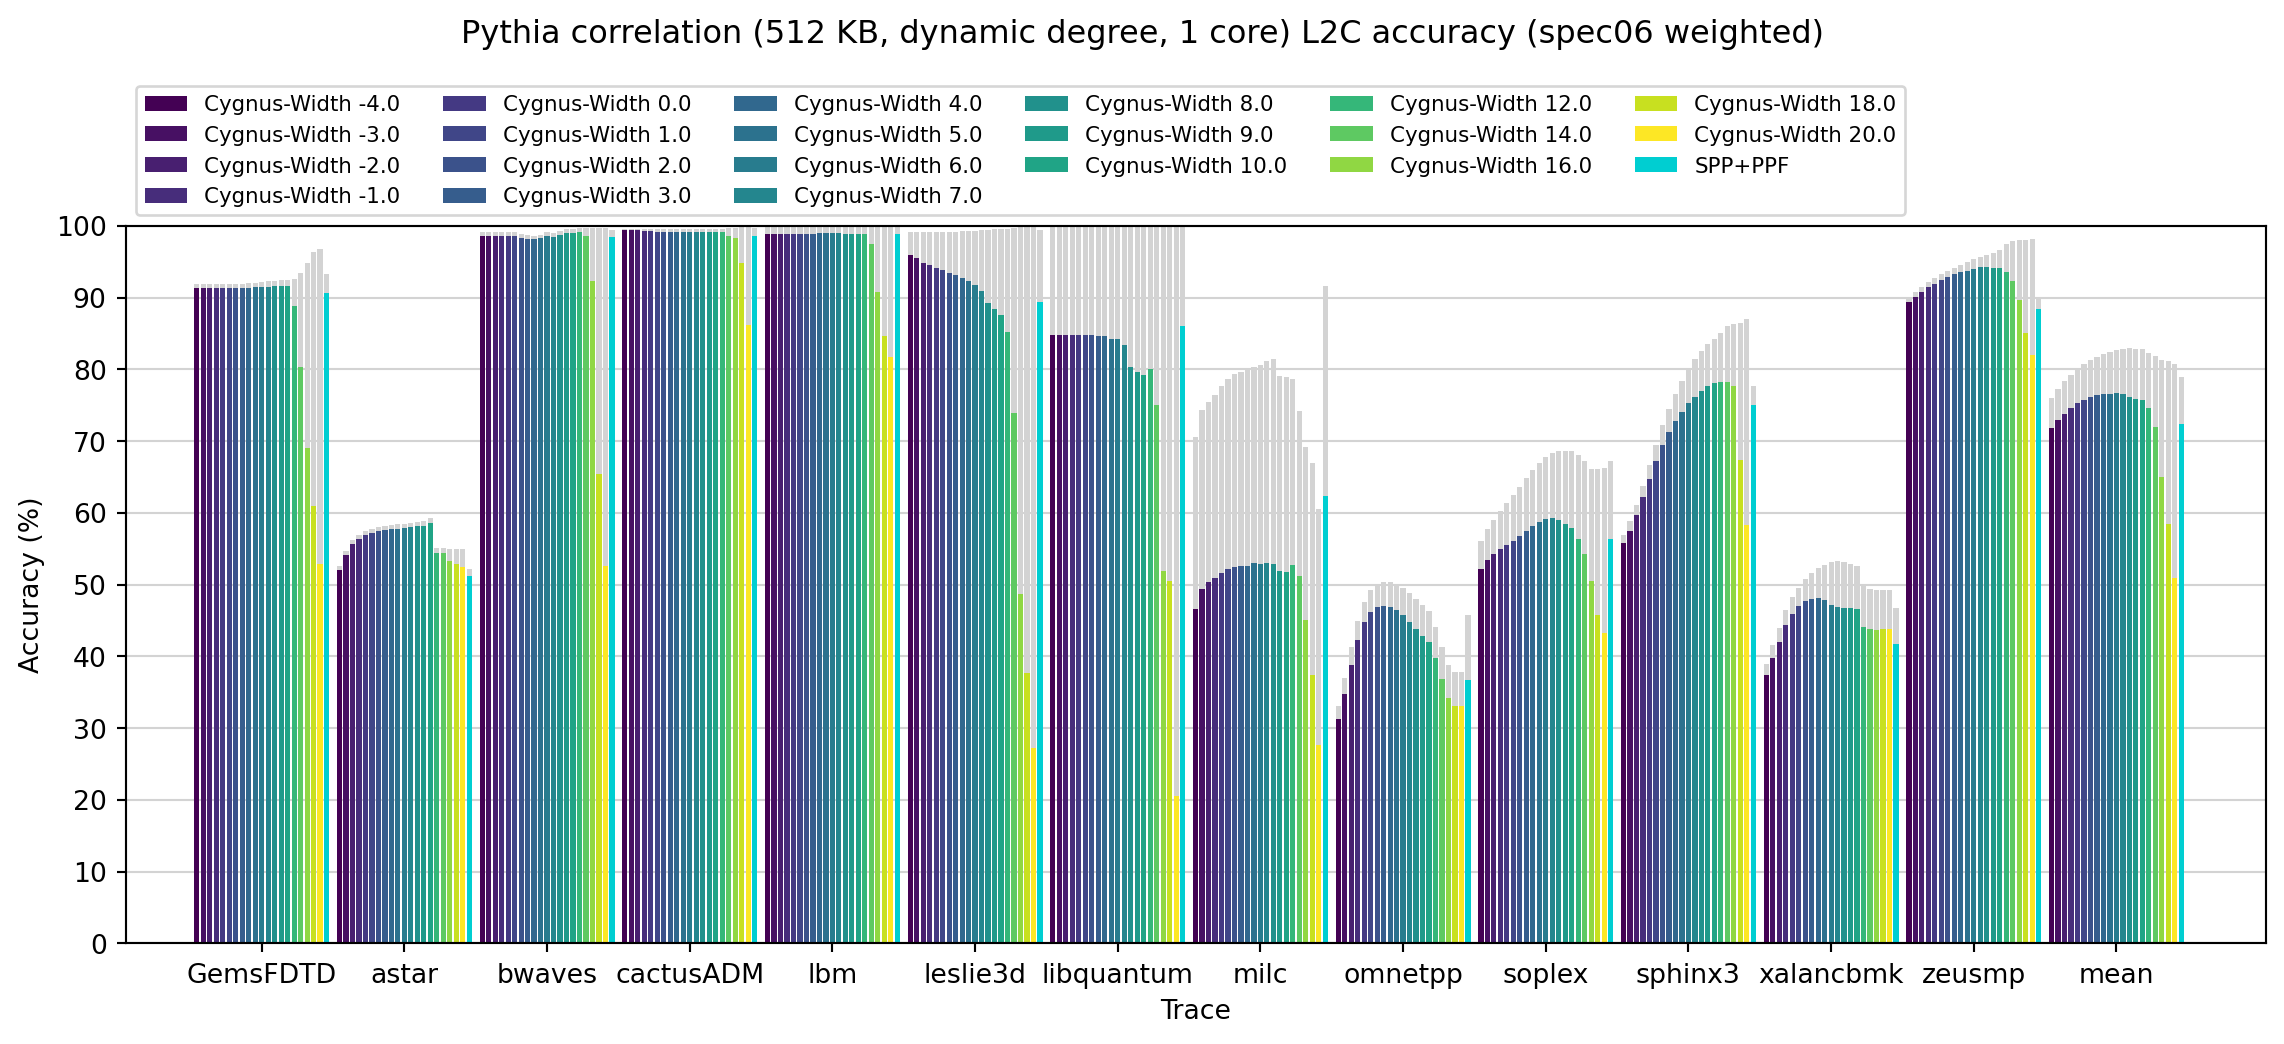

=== gap one_phase ===


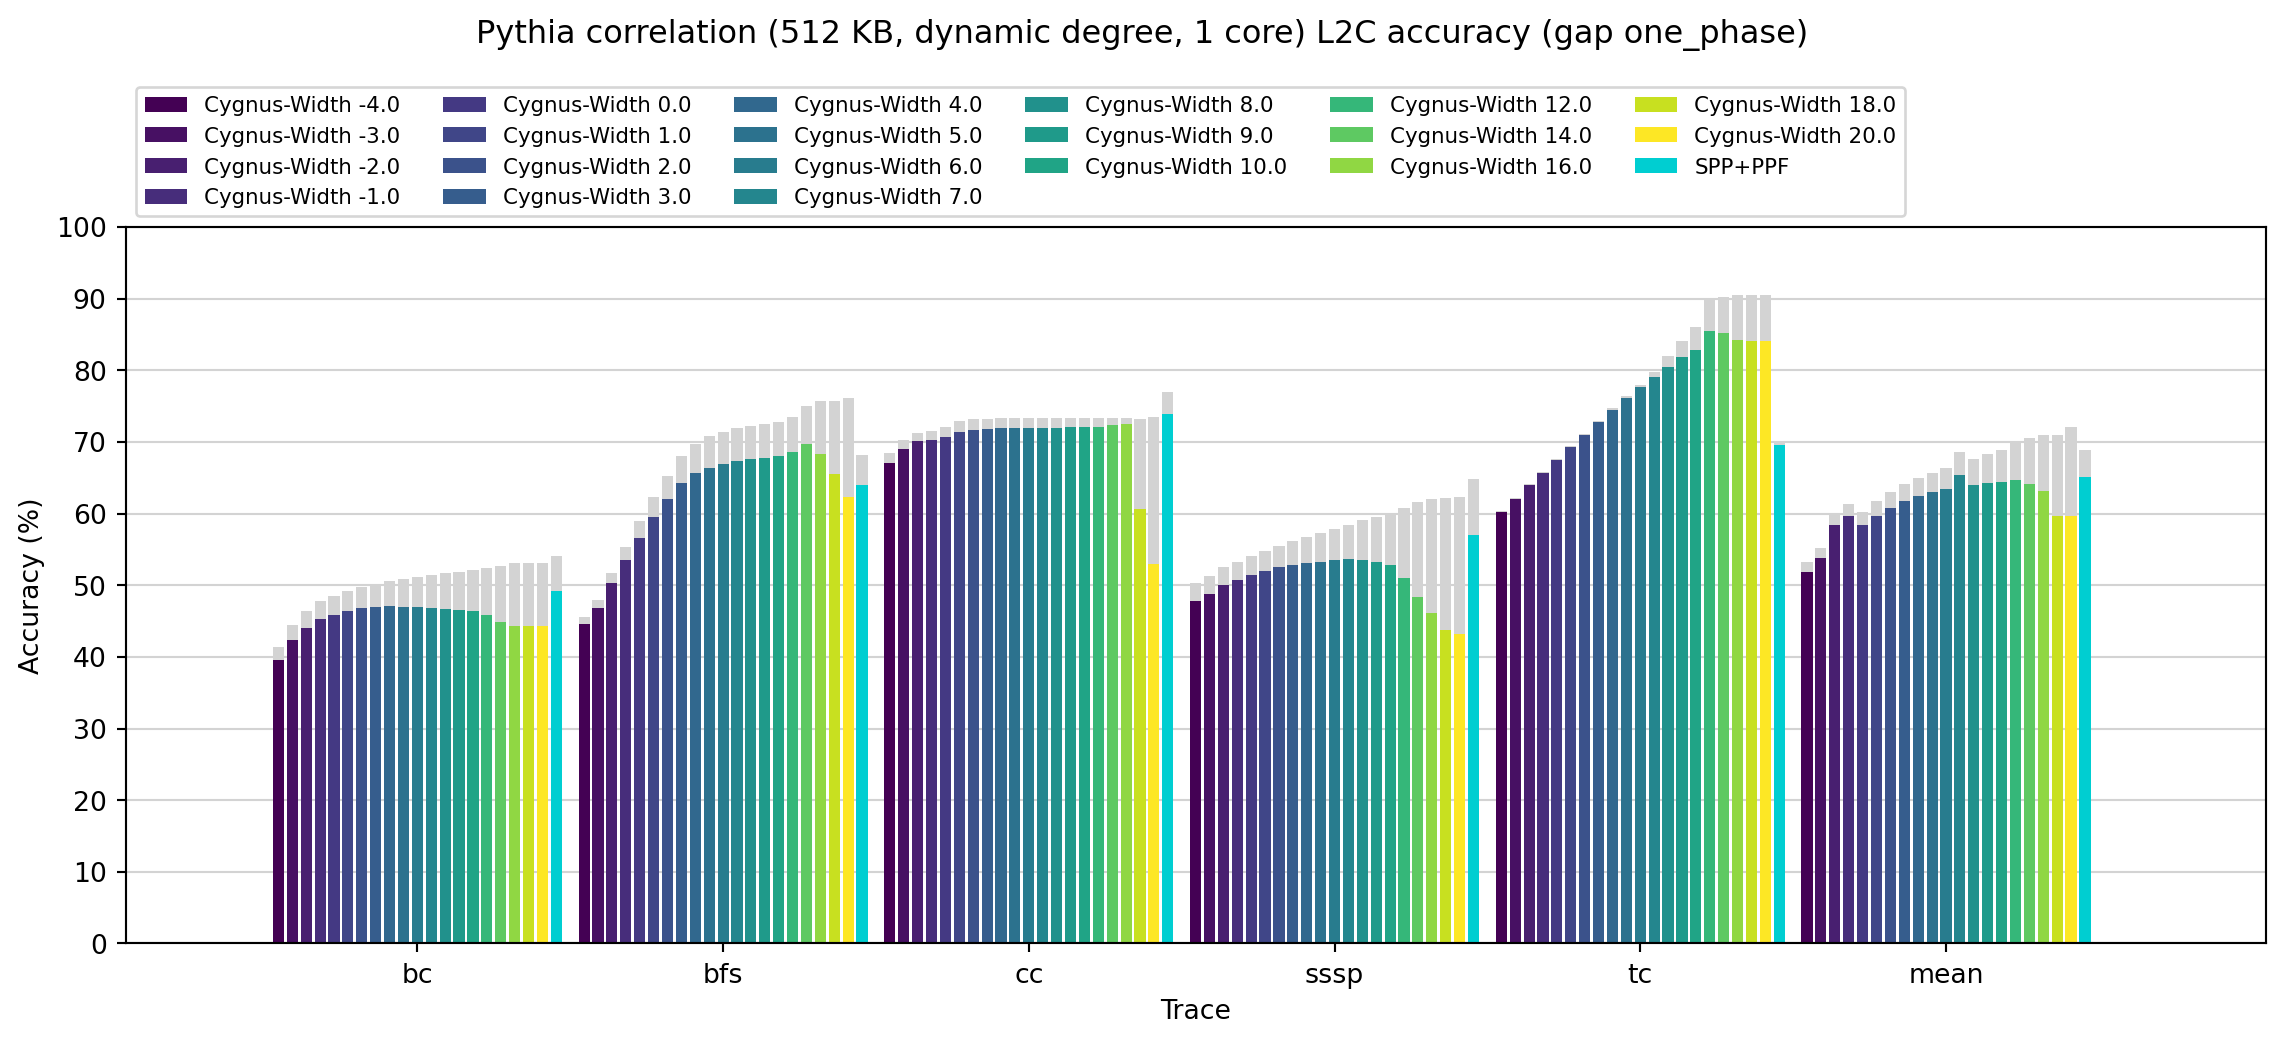

=== google one_phase ===


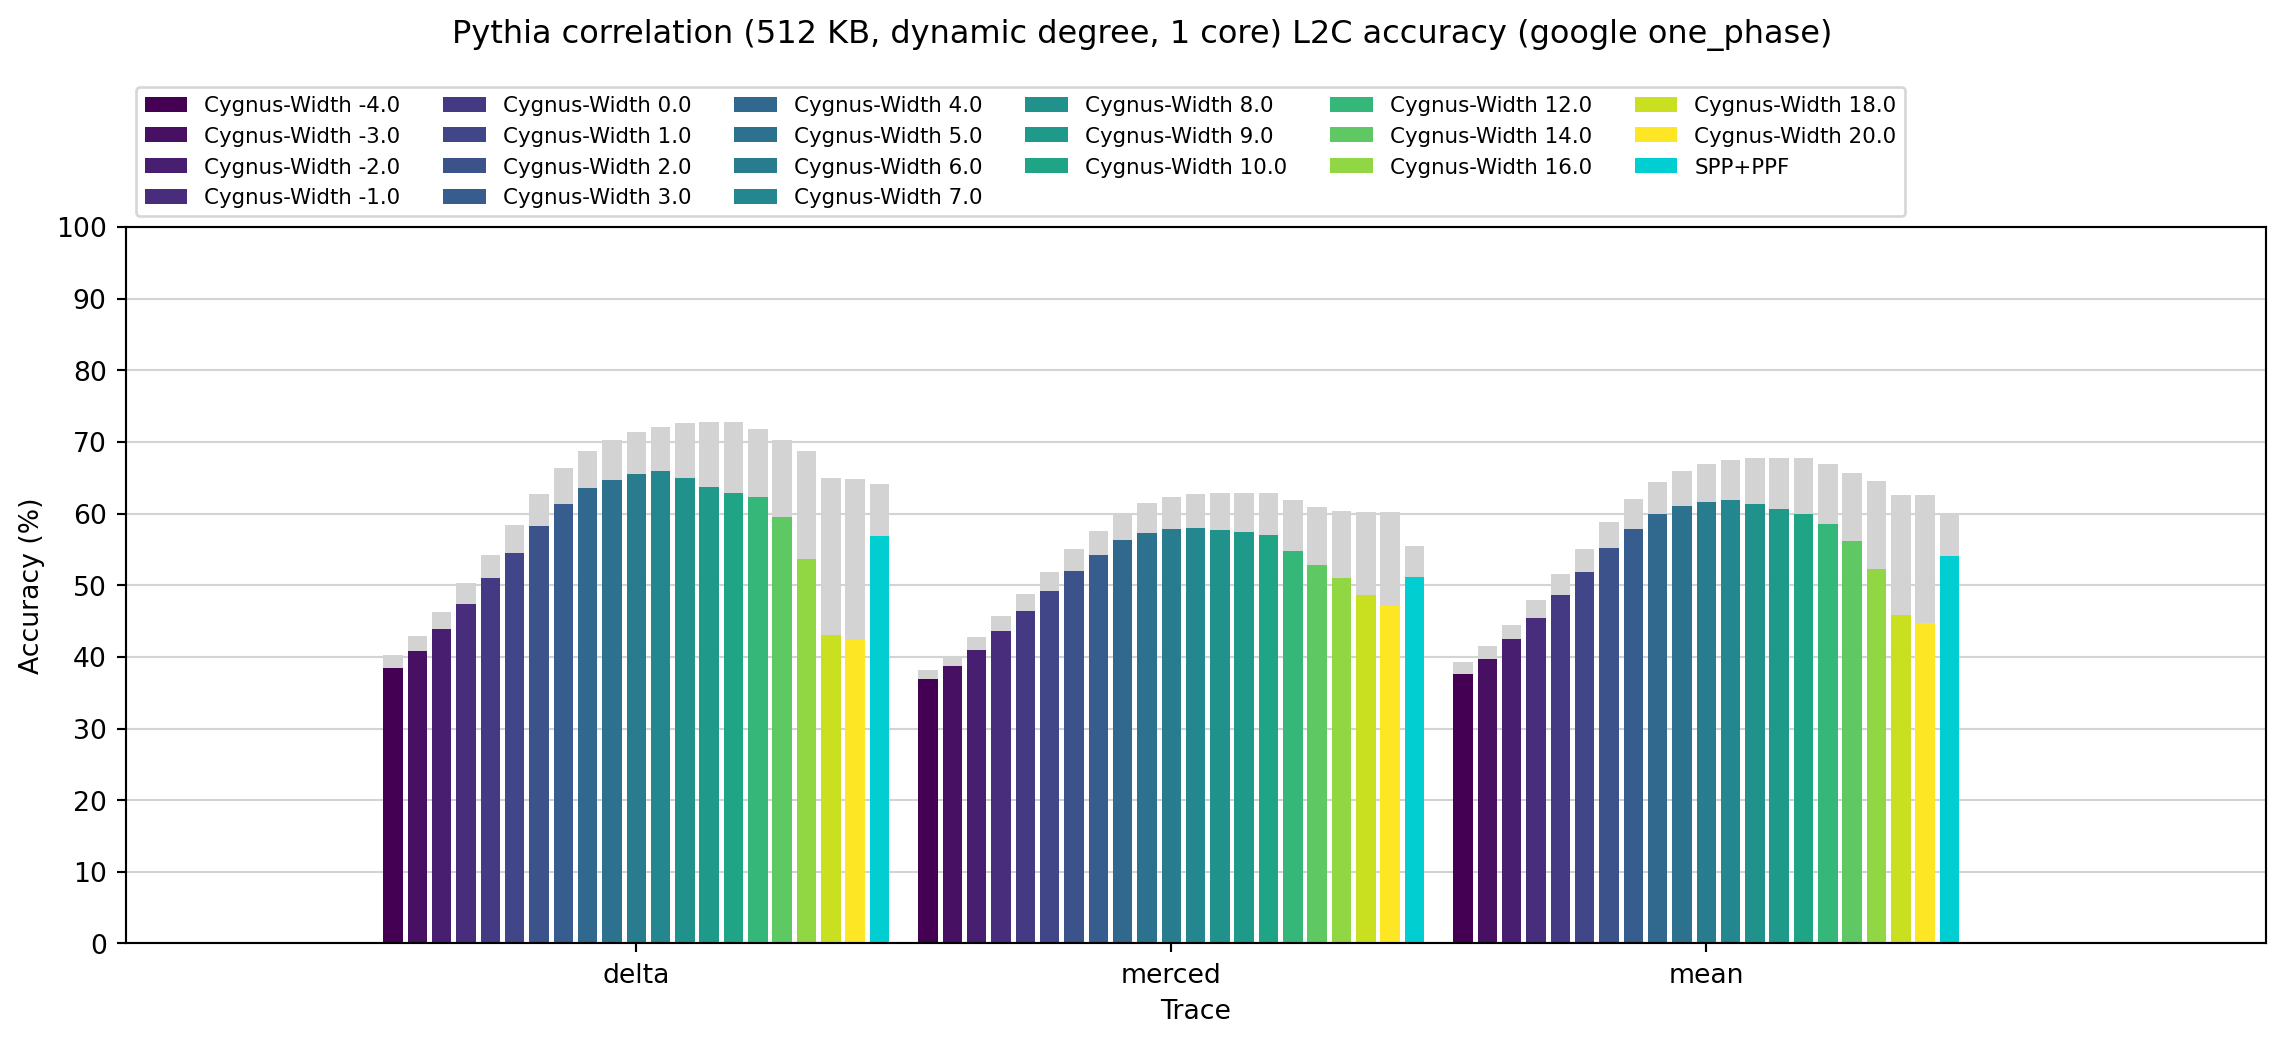

In [17]:
plots.plot_everything_accuracy(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               legend_kwargs=degreedyn_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_suptitle)

=== spec06 weighted ===


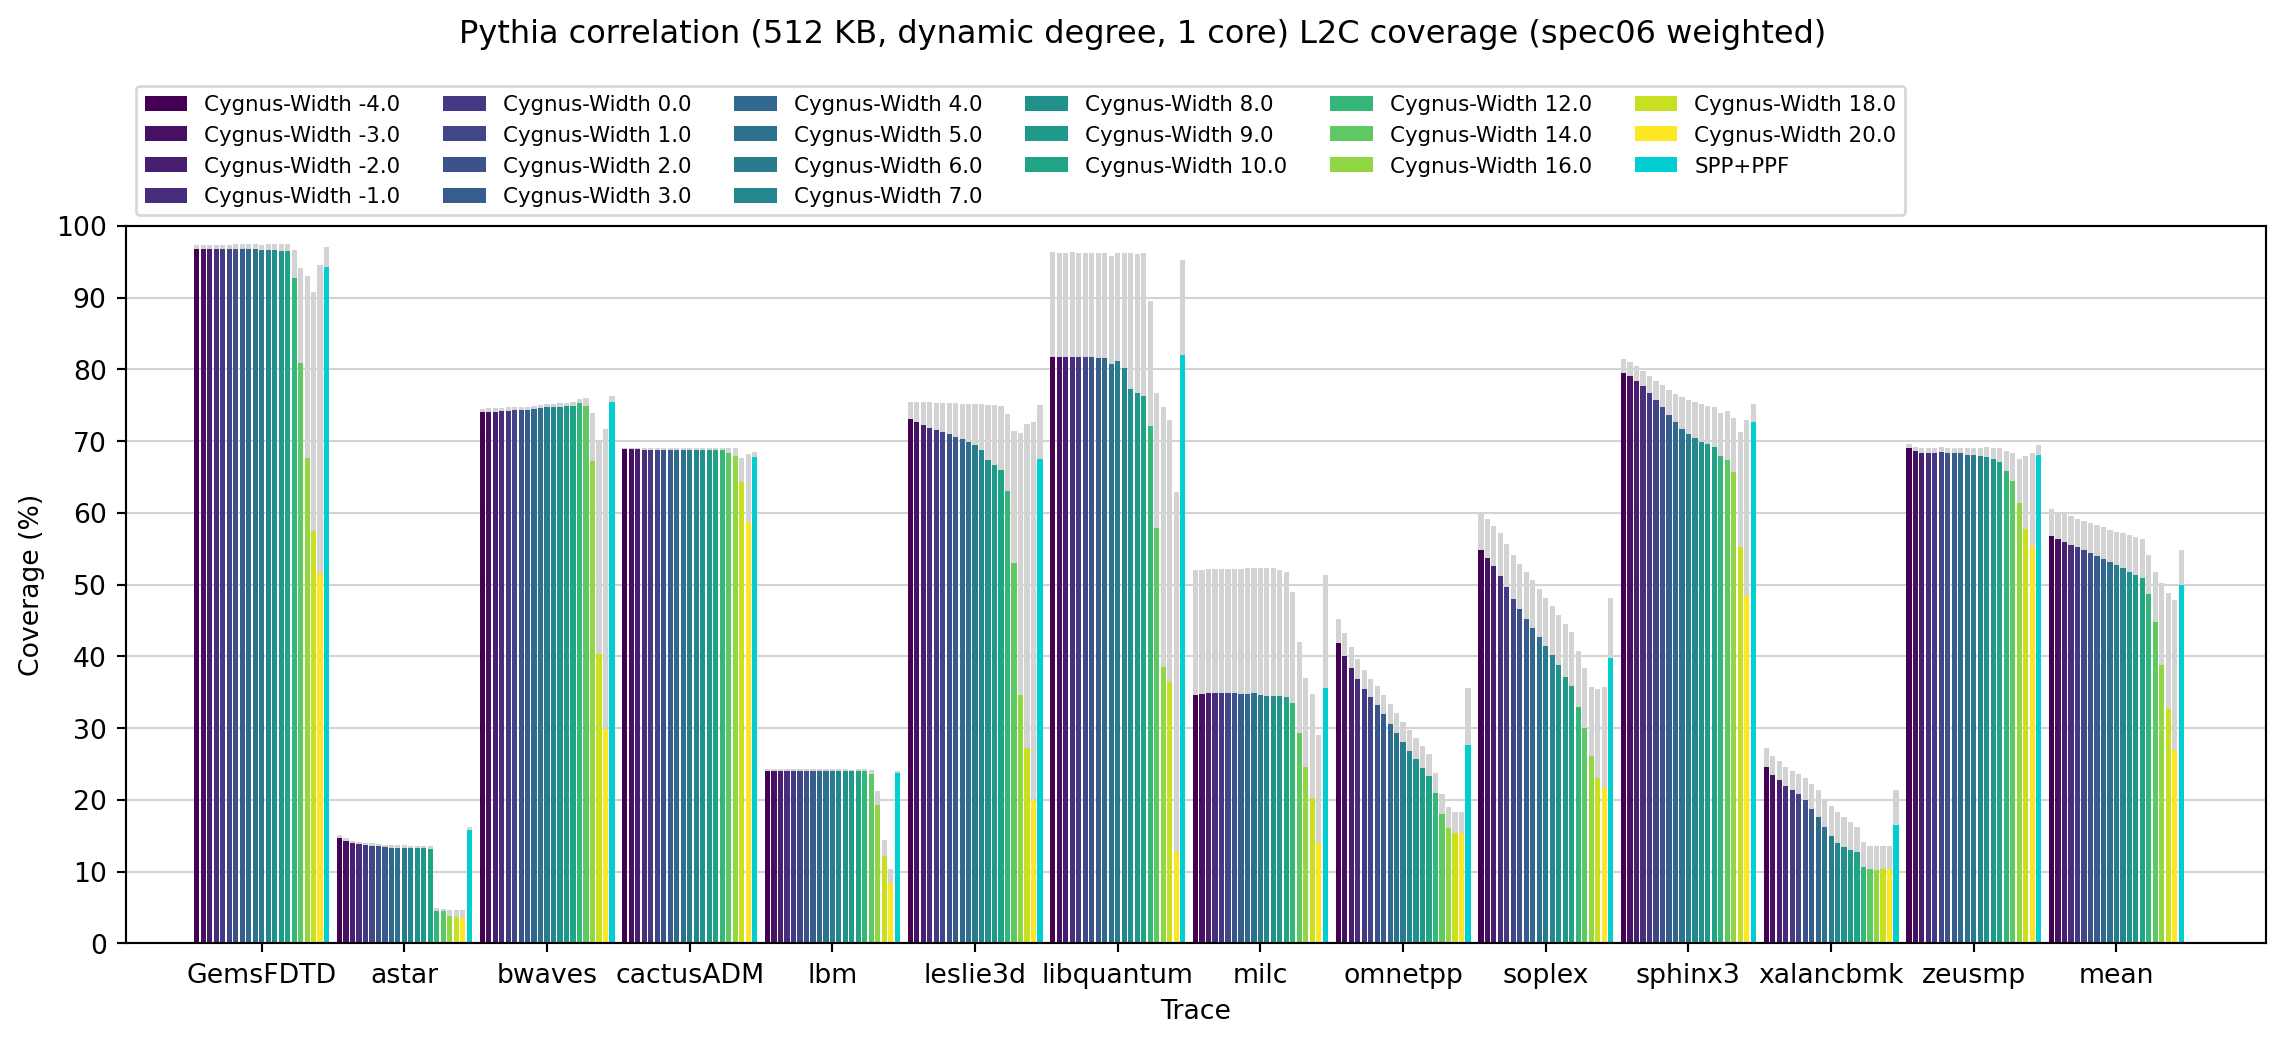

=== gap one_phase ===


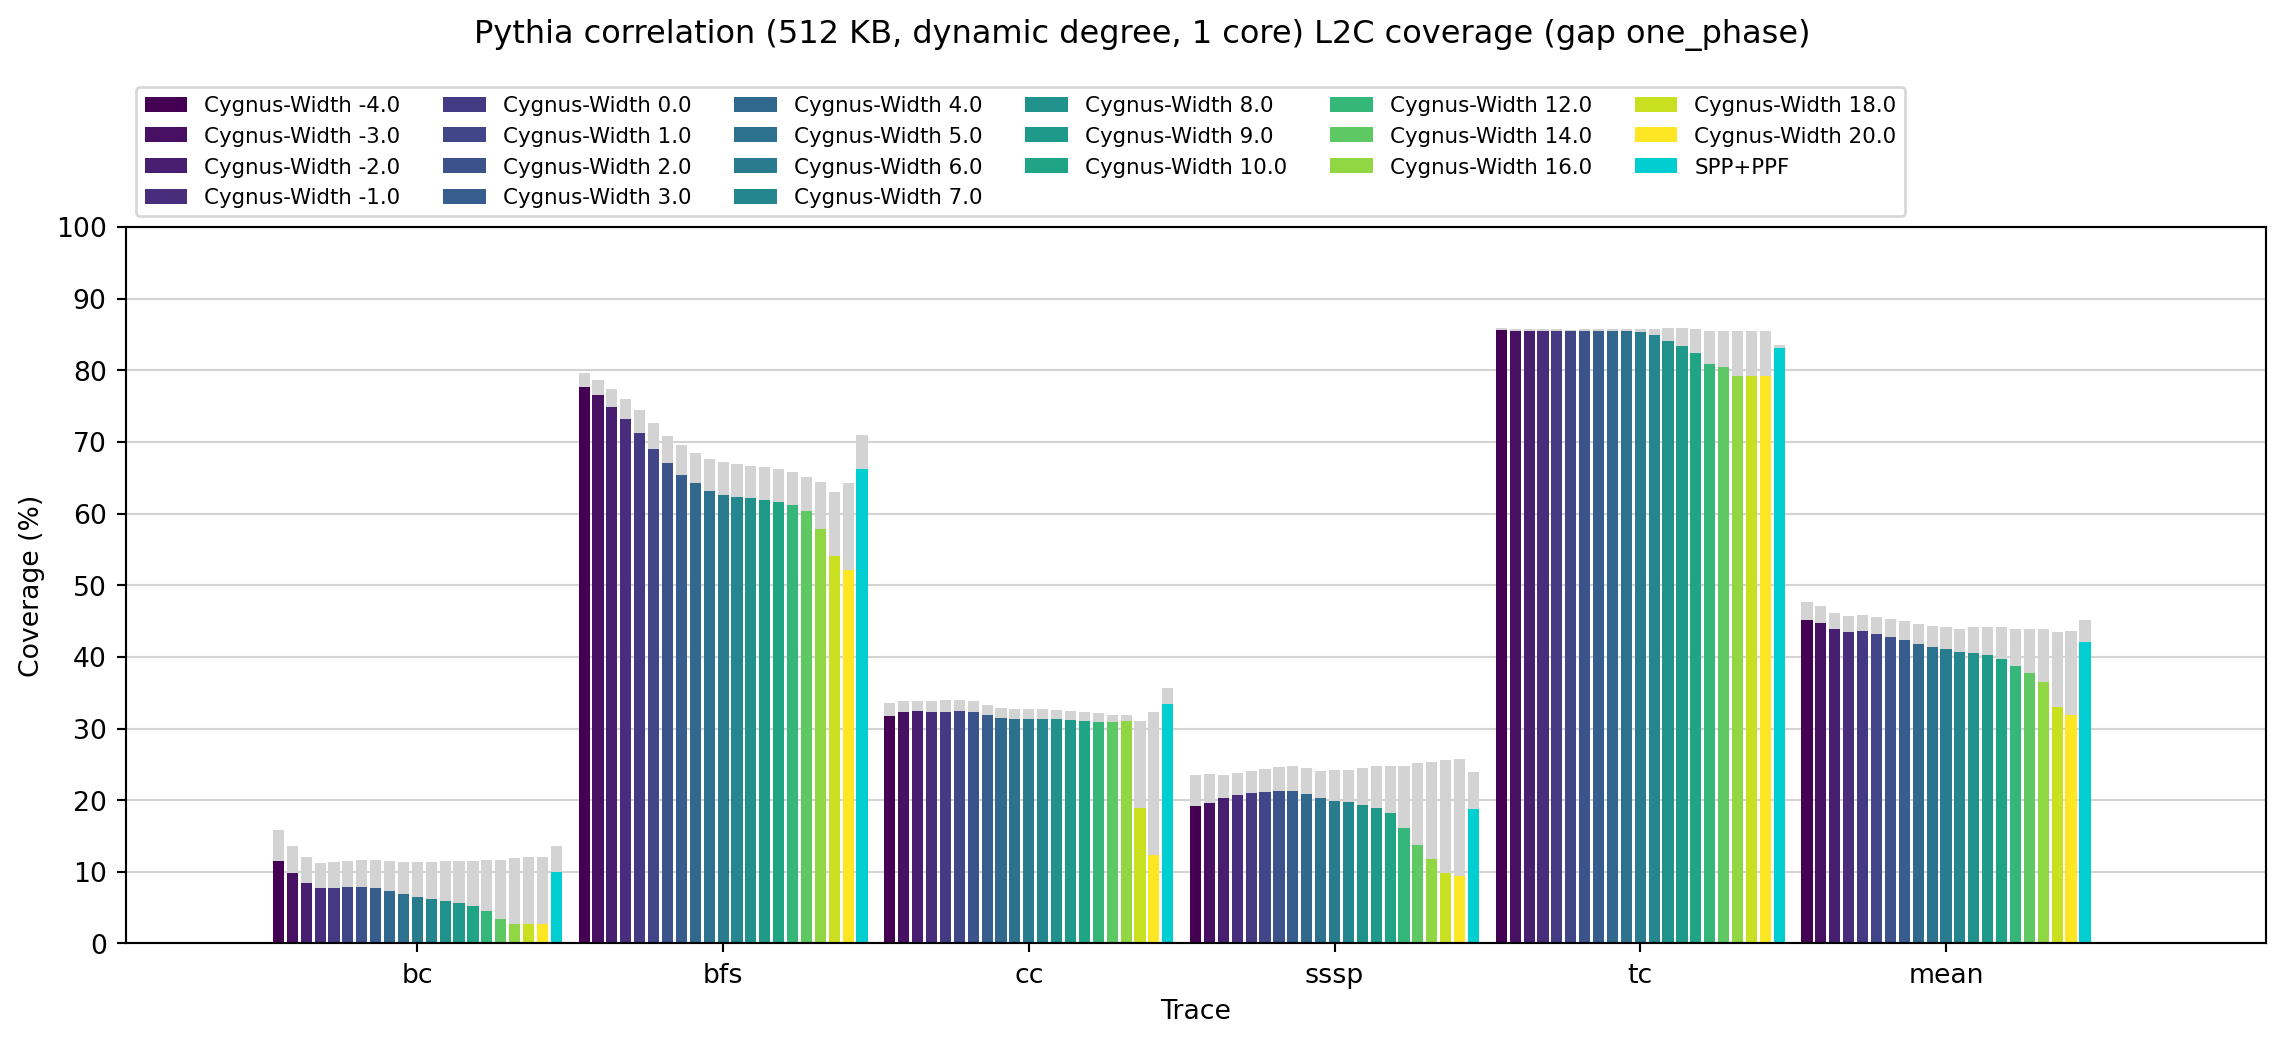

=== google one_phase ===


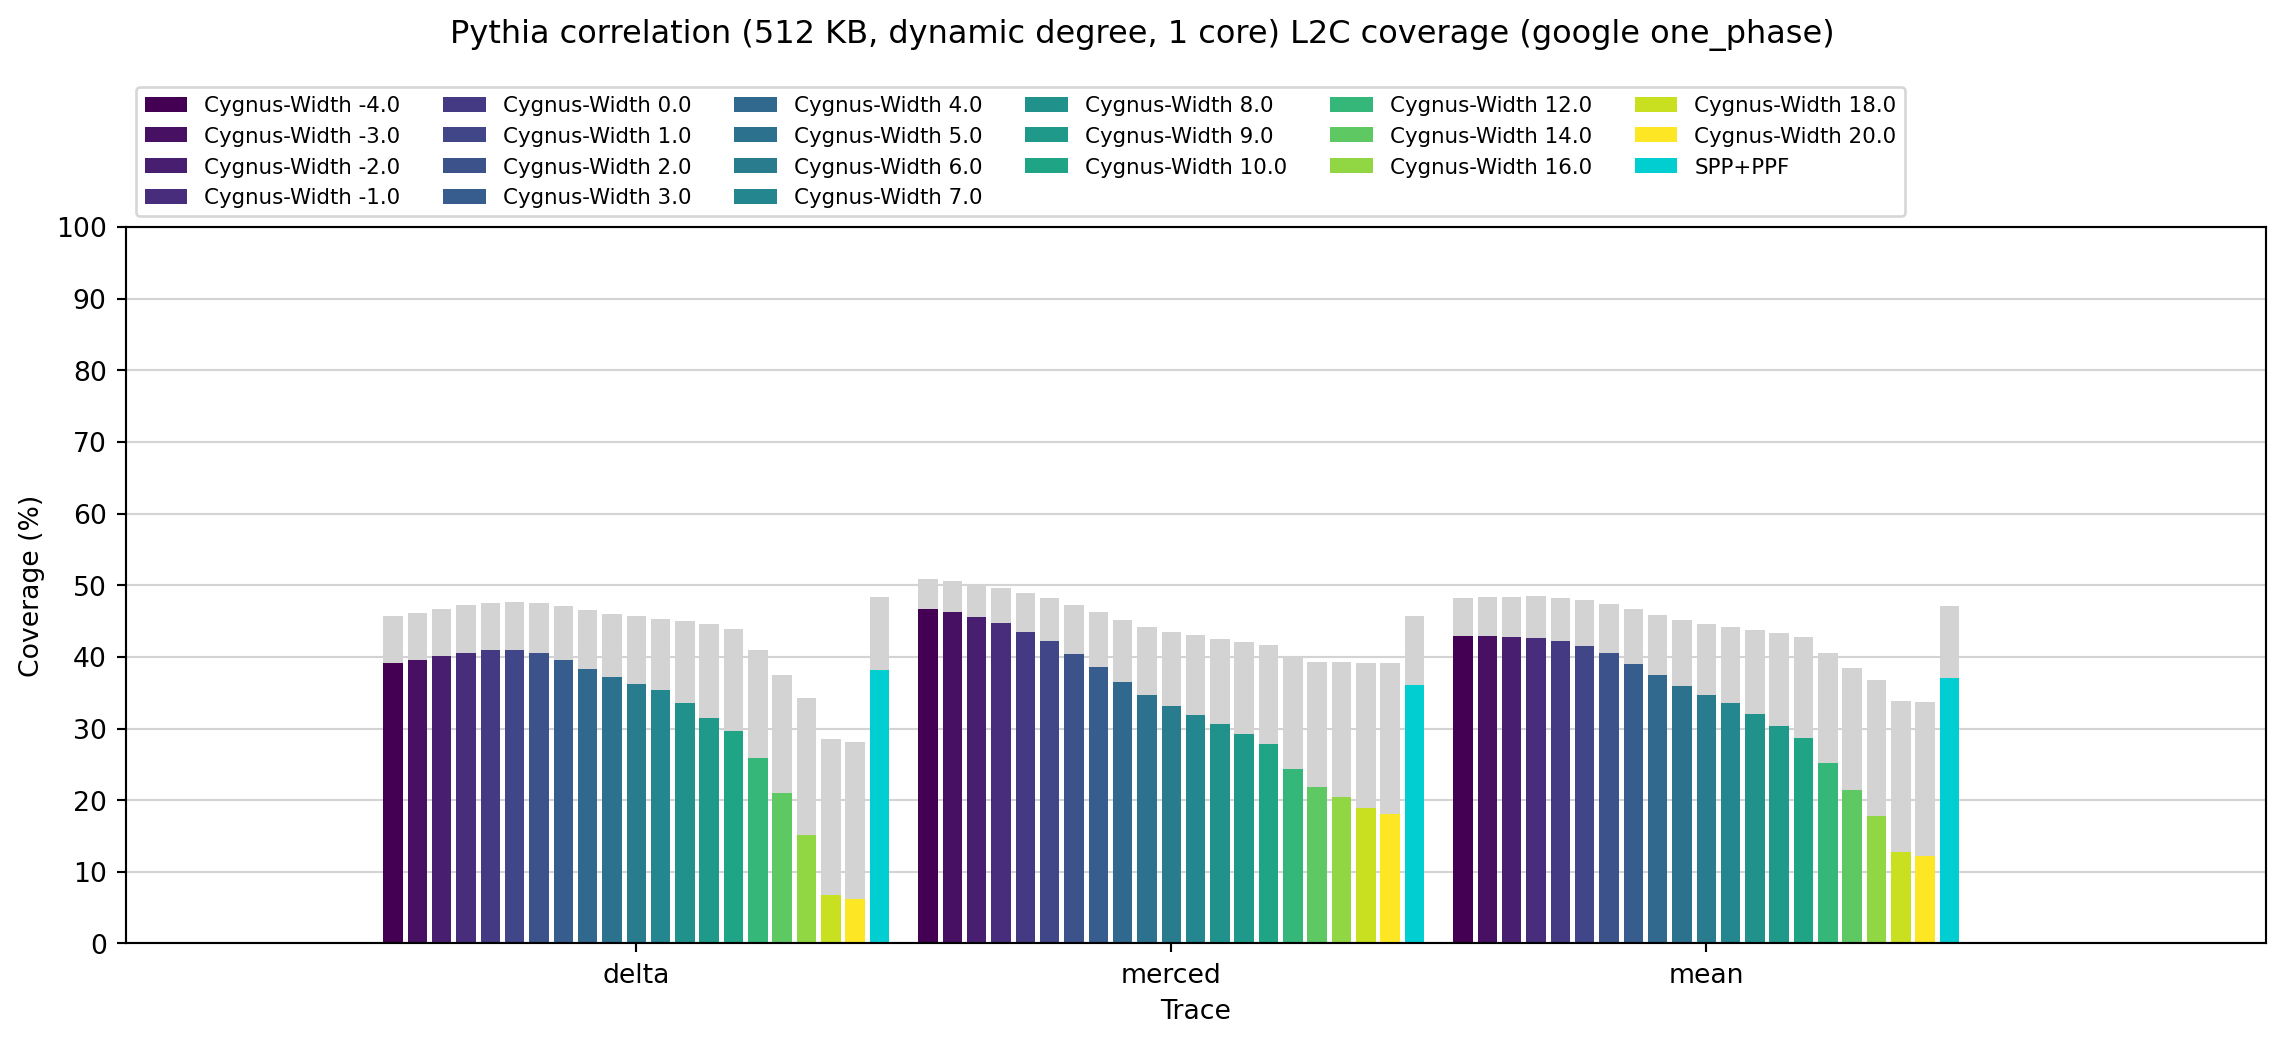

In [16]:
plots.plot_everything_coverage(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               legend_kwargs=degreedyn_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_suptitle)

# Tables

## 1-core, dynamic degree

In [73]:
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus-Width -14.0,Cygnus-Width -12.0,Cygnus-Width -10.0,Cygnus-Width -9.0,Cygnus-Width -8.0,Cygnus-Width -7.0,Cygnus-Width -6.0,Cygnus-Width -5.0,Cygnus-Width -4.0,Cygnus-Width -3.0,...,Cygnus-Width 9.0,Cygnus-Width 10.0,Cygnus-Width 12.0,Cygnus-Width 14.0,Cygnus-Width 16.0,Cygnus-Width 18.0,Cygnus-Width 20.0,SPP+PPF,Pythia-Width 3.0,Pythia-Depth
run_name,,,,,,,,,,,,,,,,,,,,,
GemsFDTD_weighted,136.755177,136.755177,137.062736,137.017702,137.740537,137.853876,138.028185,138.036031,138.132894,138.165658,...,132.826193,132.422256,119.870500,95.580072,83.820254,71.874262,68.599876,118.804557,131.588894,102.478932
astar_weighted,3.892205,3.892205,4.047586,4.847814,9.519525,9.698332,8.403577,8.061493,7.862760,7.769024,...,7.506512,7.518490,5.899706,5.890356,5.866601,5.857736,5.860814,7.621905,7.557013,7.520233
bwaves_weighted,59.773654,59.773654,59.775725,59.796618,60.205276,60.476513,60.602328,60.802846,61.028566,61.297427,...,63.413948,63.709718,65.105390,64.758525,52.721611,32.106747,28.393976,63.564616,57.032797,41.388990
cactusADM_weighted,12.031825,12.031825,12.076651,12.013955,11.832350,11.787889,11.793679,11.789087,11.787157,11.779296,...,11.729887,11.733874,11.725246,11.771062,11.752599,11.310188,11.295220,11.650472,12.000205,11.483537
lbm_weighted,41.044154,41.044154,41.044154,41.029545,41.032883,41.116395,41.080513,41.082500,41.051488,41.063770,...,41.867374,41.974343,42.172271,42.704576,31.227348,12.352952,4.242525,42.309817,40.806727,35.252199
leslie3d_weighted,97.528747,97.528747,97.997047,98.709937,99.859431,100.899541,101.263750,101.450923,101.546518,101.574958,...,92.920835,90.954168,81.953472,64.113976,49.890684,45.137688,41.827751,92.638373,99.005214,76.139197
libquantum_weighted,102.207985,102.207985,102.207985,102.207985,102.097377,102.139341,102.153013,102.163260,102.131202,102.179680,...,99.729509,100.959998,95.429081,71.010221,46.374480,41.316280,20.855208,104.588503,97.379599,78.595864
mcf_weighted,9.445865,9.445865,9.466697,13.072901,26.142655,33.012696,30.960893,30.867374,30.940366,31.034944,...,31.137702,31.137923,31.130501,31.130501,31.130501,31.130501,31.130501,10.975901,31.039102,31.829690
milc_weighted,-6.372098,-6.372098,-6.296004,-6.093267,6.779169,18.167814,25.007811,25.462663,26.643607,27.896323,...,22.750314,22.266949,19.820648,16.168647,8.122648,6.633009,6.071067,29.765960,-3.192096,15.099107


=== gap one_phase ===
ipc_improvement


,Cygnus-Width -14.0,Cygnus-Width -12.0,Cygnus-Width -10.0,Cygnus-Width -9.0,Cygnus-Width -8.0,Cygnus-Width -7.0,Cygnus-Width -6.0,Cygnus-Width -5.0,Cygnus-Width -4.0,Cygnus-Width -3.0,...,Cygnus-Width 9.0,Cygnus-Width 10.0,Cygnus-Width 12.0,Cygnus-Width 14.0,Cygnus-Width 16.0,Cygnus-Width 18.0,Cygnus-Width 20.0,SPP+PPF,Pythia-Width 3.0,Pythia-Depth
run_name,,,,,,,,,,,,,,,,,,,,,
bc,34.970106,34.970106,34.954873,35.343655,36.705083,35.236160,33.176967,32.456699,32.032432,31.651093,...,29.693510,29.284995,28.197410,27.417769,27.196028,27.169544,27.168852,26.196724,25.792537,30.374484
bfs,55.134059,55.134059,55.127123,55.124547,55.552187,55.486198,55.398411,55.230367,55.005846,53.790896,...,34.231219,34.169788,33.898500,33.127638,31.727999,29.013535,28.760874,41.939044,49.799655,37.396706
cc,50.472659,50.472659,50.472185,50.428088,50.547893,50.952984,51.235109,51.394902,51.436628,51.372932,...,50.171725,50.145172,50.032006,49.208705,49.401372,44.325167,41.410501,49.662003,47.144526,46.920248
pr,3.544629,3.544629,3.553868,3.543826,3.511288,3.402025,3.130473,2.964971,2.762111,2.544388,...,1.974773,1.940628,1.888809,1.863903,1.811280,1.655821,1.579899,2.241102,1.842211,2.307785
sssp,23.813937,23.813937,23.835246,24.347871,27.331110,28.297284,26.886916,26.945472,27.048032,27.012344,...,25.147559,24.558361,22.728919,21.754775,20.909351,20.190740,20.028758,23.849279,20.305080,22.882585
tc,24.489497,24.489497,24.541696,24.978388,26.032942,26.114805,26.123845,26.142433,26.190049,26.212838,...,26.561555,26.417561,26.177572,26.113914,25.915557,25.938346,25.938346,25.818542,26.006587,25.965210
mean,30.889666,30.889666,30.901006,31.121570,32.116470,32.085910,31.478547,31.337364,31.224305,30.931491,...,27.134323,26.922993,26.322993,25.774795,25.354588,24.047196,23.542457,27.375977,27.424363,26.857662


=== google one_phase ===
ipc_improvement


,Cygnus-Width -14.0,Cygnus-Width -12.0,Cygnus-Width -10.0,Cygnus-Width -9.0,Cygnus-Width -8.0,Cygnus-Width -7.0,Cygnus-Width -6.0,Cygnus-Width -5.0,Cygnus-Width -4.0,Cygnus-Width -3.0,...,Cygnus-Width 9.0,Cygnus-Width 10.0,Cygnus-Width 12.0,Cygnus-Width 14.0,Cygnus-Width 16.0,Cygnus-Width 18.0,Cygnus-Width 20.0,SPP+PPF,Pythia-Width 3.0,Pythia-Depth
run_name,,,,,,,,,,,,,,,,,,,,,
delta_507252,8.633440,8.633440,8.573240,8.594709,9.062820,11.481274,13.241007,14.440805,15.678899,17.065536,...,19.134828,18.590125,16.917428,15.846589,13.996194,9.979459,9.656264,19.895382,16.840546,18.416632
merced_467642,22.885606,22.885606,22.872059,22.876337,23.333519,24.519966,26.011440,26.796035,27.203591,27.467547,...,20.398487,19.662804,17.932044,16.948091,16.559359,16.399787,16.349449,24.161323,23.978935,24.455368
mean,15.539976,15.539976,15.501591,15.515021,15.978883,17.820391,19.455692,20.460119,21.304458,22.155871,...,19.764991,19.125257,17.423641,16.396037,15.270652,13.144093,12.953291,22.009710,20.356830,21.398458


In [74]:
tables.table_metric_all(degreedyn_1core_df, suites=suites, metric='ipc_improvement')

,all,spec06,gap,google
Cygnus-Width -14.0,34.816434,39.578185,30.889666,15.539976
Cygnus-Width -12.0,34.816434,39.578185,30.889666,15.539976
Cygnus-Width -10.0,34.857420,39.646317,30.901006,15.501591
Cygnus-Width -9.0,35.333783,40.318640,31.121570,15.515021
Cygnus-Width -8.0,37.899293,43.971354,32.116470,15.978883
Cygnus-Width -7.0,39.512768,46.312189,32.085910,17.820391
Cygnus-Width -6.0,39.837916,46.849285,31.478547,19.455692
Cygnus-Width -5.0,39.972730,46.963654,31.337364,20.460119
Cygnus-Width -4.0,40.059936,47.015097,31.224305,21.304458
Cygnus-Width -3.0,40.041168,46.977998,30.931491,22.155871
